# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

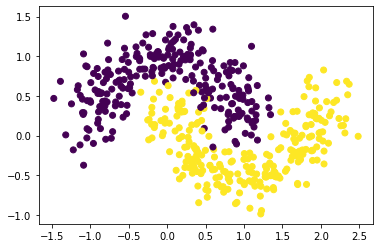

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

In [3]:
!pip install mlxtend

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE
from matplotlib.colors import ListedColormap

X, y = moons_points, moons_labels
lr = lr.fit(X, y)
svm = svm.fit(X, y)

In [5]:
def plot_decisions(dataset, estimator, title, poly_features=None):
    X, y = dataset
    cmap = ListedColormap(['r', 'g', 'b', 'black'])

    if poly_features is None:
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        h = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
        Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        x_min, x_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        y_min, y_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
        h = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        plt.scatter(X[:, 1], X[:, 2], c=y, cmap=cmap)
        Z = estimator.predict(poly_features.transform(np.c_[xx.ravel(), yy.ravel()]))

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

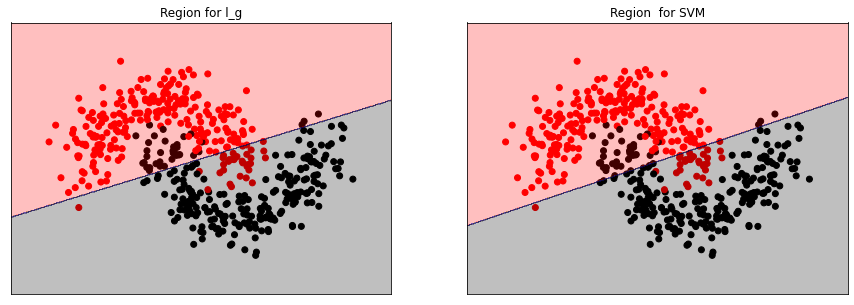

In [6]:
dataset = (X, y)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
plot_decisions(dataset=dataset, estimator=lr, title='Region for l_g')
plt.subplot(122)
plot_decisions(dataset=dataset, estimator=svm, title='Region  for SVM')

In [7]:
from sklearn.metrics import roc_auc_score

print('ROC AUC for lg :', roc_auc_score(y, lr.predict(X)))
print('ROC AUC for SVM with linear kernel :', roc_auc_score(y, svm.predict(X)))

ROC AUC for lg : 0.856
ROC AUC for SVM with linear kernel : 0.858


## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

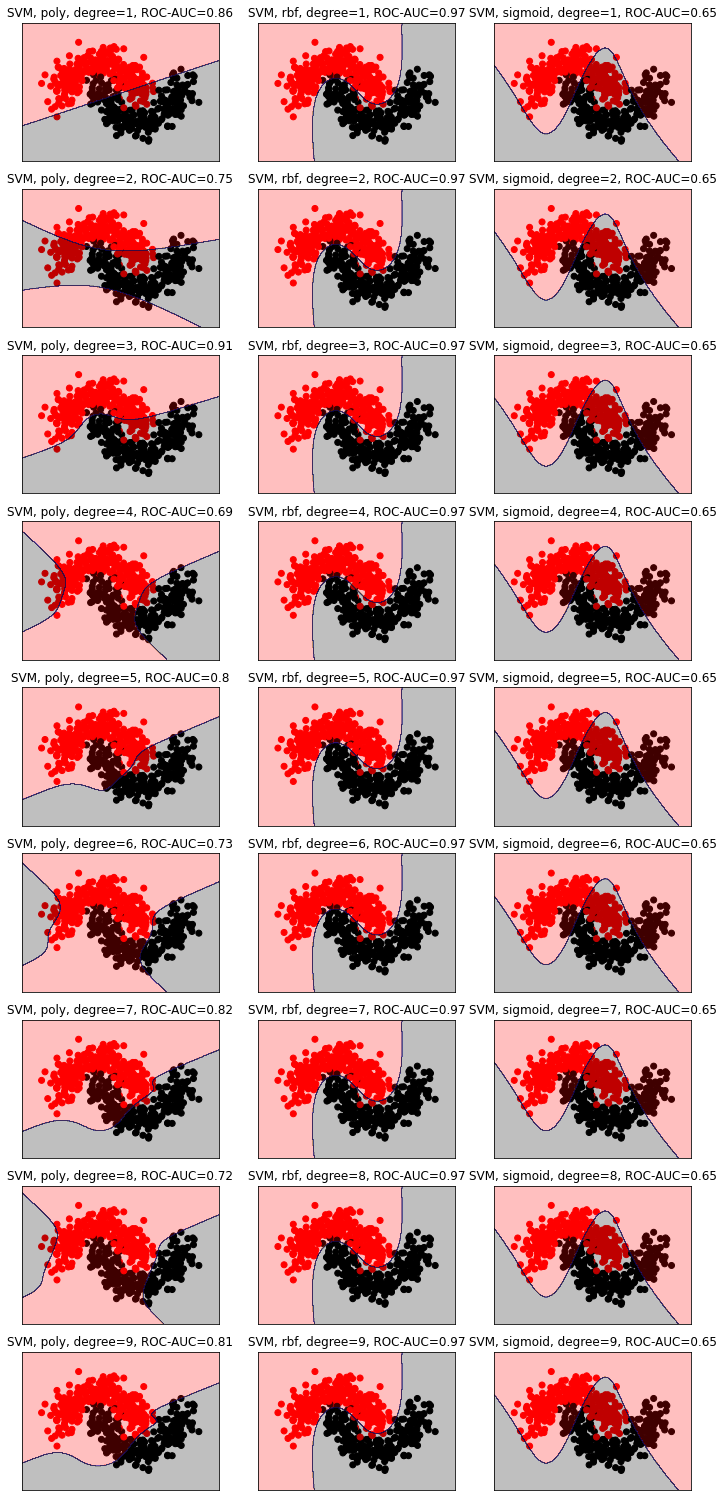

In [8]:
### YOUR CODE HERE
fig, ax = plt.subplots(9, 3, figsize=(12, 27))

for col, kernel in enumerate(['poly', 'rbf', 'sigmoid']):
    for degree in range(1, 10):
        svm_model = SVC(
            C=1.0, kernel=kernel, degree=degree, random_state=42
        ).fit(X, y)

        plt.subplot(9, 3, (degree - 1) * 3 + col + 1)

        plot_decisions(
            dataset, svm_model,
            f'SVM, {kernel}, degree={degree}, ROC-AUC={np.round(roc_auc_score(y, svm_model.predict(X)), decimals=2)}'
        )


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

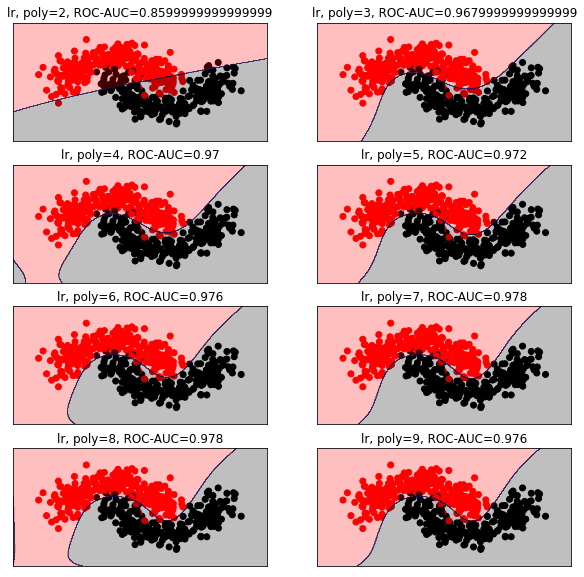

In [9]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
fig, ax = plt.subplots(4, 2, figsize=(10, 10))

for poly in range(2, 10):
    plt.subplot(4, 2, poly - 1)

    poly_feat = PolynomialFeatures(poly)
    poly_X = poly_feat.fit_transform(X)
    poly_dataset = poly_X, y

    lr = LogisticRegression(C=1, fit_intercept=True, random_state=42, max_iter=500)
    lr = lr.fit(poly_X, y)

    plot_decisions(
        poly_dataset, lr,
        f'lr, poly={poly}, ROC-AUC={roc_auc_score(y, lr.predict(poly_X))}',
        poly_features=poly_feat
    )



## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

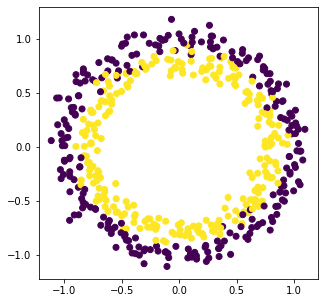

In [10]:
from sklearn.datasets import make_circles
from sklearn.metrics import f1_score, accuracy_score

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

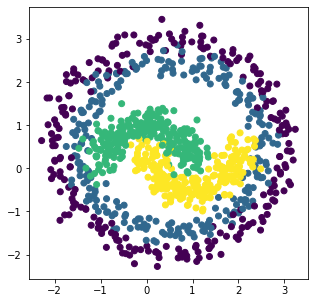

In [11]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

F1 weighted for simple LR : 0.32646511104635023
Accuracy for simple LR : 0.394


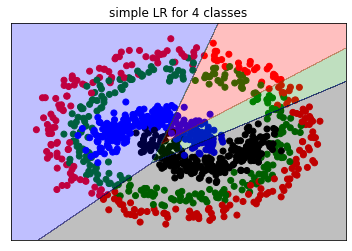

In [12]:
### YOUR CODE HERE
lr = LogisticRegression(C=1, fit_intercept=True, random_state=42, max_iter=500)
lr = lr.fit(points, labels)
print('F1 weighted for simple LR :', f1_score(labels, lr.predict(points), average='weighted'))
print('Accuracy for simple LR :', accuracy_score(labels, lr.predict(points)))
plot_decisions((points, labels), lr, 'simple LR for 4 classes')

In [13]:
!pip install scikit-plot

from scikitplot.metrics import plot_roc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

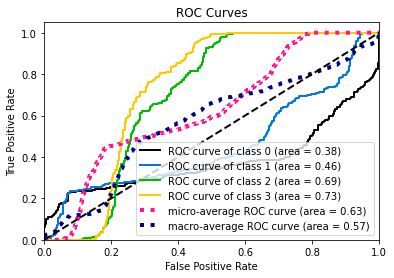

In [14]:
plot_roc(labels, lr.predict_proba(points))

In [15]:
from warnings import filterwarnings
filterwarnings(action='ignore')

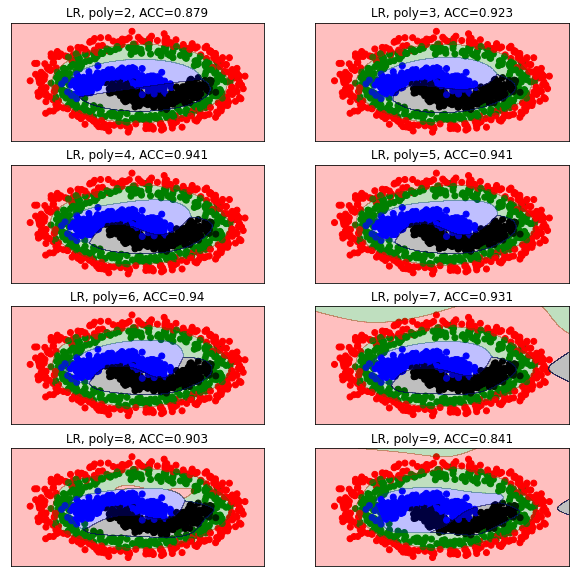

In [20]:
fig, ax = plt.subplots(4, 2, figsize = (10, 10))

for poly in range(2, 10):
    plt.subplot(4, 2, poly - 1)

    poly_feat = PolynomialFeatures(poly)
    poly_points = poly_feat.fit_transform(points)
    poly_dataset = poly_points, labels

    lr = LogisticRegression(C=1, fit_intercept=True, random_state=42, max_iter=500)
    lr = lr.fit(poly_points, labels)

    plot_decisions(
        poly_dataset, lr,
        f'LR, poly={poly}, ACC={accuracy_score(labels, lr.predict(poly_points))}',
        poly_features=poly_feat
    )

Как мы видим, использование полиномиальных функций сильно повышает точность в сравнение с простой регрессией. При этом, при степени многочлена больше 4-5 модель теряет в точности.

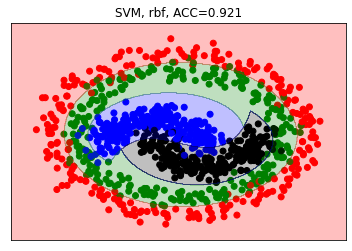

In [21]:
#SVM
svm = SVC(
    C=1.0, kernel='rbf', random_state=42, probability=True
).fit(points, labels)

plot_decisions(
    (points, labels), svm,
    f'SVM, rbf, ACC={accuracy_score(labels, svm.predict(points))}'
)

In [23]:
!pip install xgboost

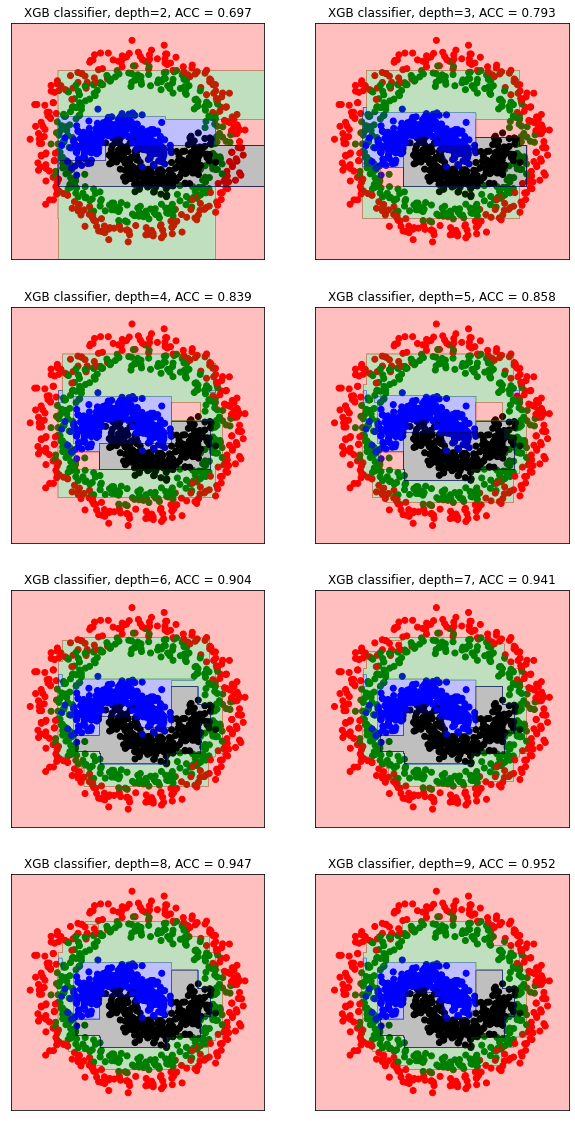

In [26]:
#XGB

import xgboost as xgb
from xgboost import XGBClassifier

fid, ax = plt.subplots(4, 2, figsize=(10, 20))

for depth in range(2, 10):
    xgbc = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=depth,
        learning_rate=1e-3,
        n_jobs=-1,
        random_state=42
    ).fit(points, labels)

    plt.subplot(4, 2, depth - 1)
    plot_decisions((points, labels), xgbc, f'XGB classifier, depth={depth}, ACC = {accuracy_score(labels, xgbc.predict(points))}')

При увеличении глубины до 9, точность продолжает расти. Посмотрим, что будет, если глубину сделать ещё больше.

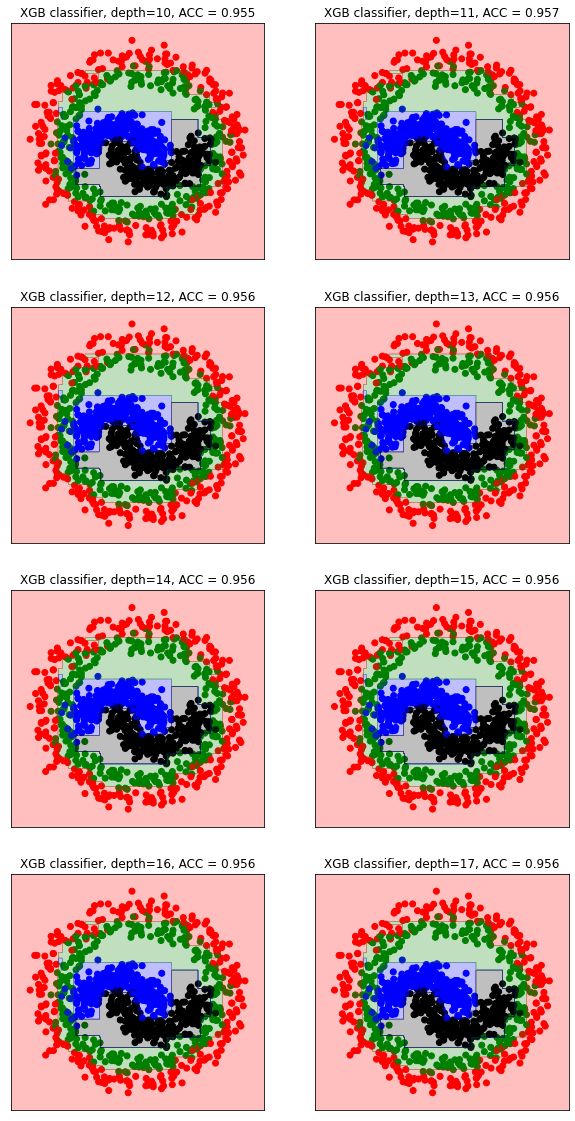

In [27]:
fid, ax = plt.subplots(4, 2, figsize=(10, 20))

for depth in range(10, 18):
    del xgbc
    xgbc = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=depth,
        learning_rate=1e-3,
        n_jobs=-1,
        random_state=42
    ).fit(points, labels)

    plt.subplot(4, 2, depth - 9)
    plot_decisions((points, labels), xgbc, f'XGB classifier, depth={depth}, ACC = {accuracy_score(labels, xgbc.predict(points))}')

После глубины 11 прироста точности нет, то есть это оптимальная глубина с точки зрения точности.
Также можно заметить, что после 7 скорость роста точности резко уменьшается. 